<a href="https://colab.research.google.com/github/nived02/MultiOmics/blob/main/Assign_1_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem 6 (15 points)**
Random DNA codes for protein?. An oligonucleotide sequence T T T T AAAA is known to occur

in the protein-coding regions of a bacterial B genome with a frequency of 0.008. This exact se-
quence T T T AAAA also appears in the non-coding regions (which do not code for proteins) with

frequency 0.003. You come across a 400-not-long DNA fragment where T T T T AAAA occurs 4
times. A random 400 nt sequence can originate from protein-coding regions with a probability of
0.8. How likely is it that this 400nt sequence is from a protein-coding region given it is now known
that it also has 4 occurrences of T T T T AAAA?

In [ ]:
# Given values
p_coding <- 0.8
p_non_coding <- 1 - p_coding

freq_coding <- 0.008
freq_non_coding <- 0.003

occurrences <- 4
length_sequence <- 400

# Calculate lambda for coding and non-coding regions
lambda_coding <- freq_coding * length_sequence
lambda_non_coding <- freq_non_coding * length_sequence

# Calculate Poisson probabilities for coding and non-coding regions
P_X_given_coding <- dpois(occurrences, lambda_coding)
P_X_given_non_coding <- dpois(occurrences, lambda_non_coding)

# Apply Bayes' theorem
posterior_prob <- (P_X_given_coding * p_coding) / (P_X_given_coding * p_coding + P_X_given_non_coding * p_non_coding)

cat(sprintf("The probability that the sequence is from a protein-coding region is approximately %.4f or %.2f%%.\n", posterior_prob, posterior_prob * 100))


The probability that the sequence is from a protein-coding region is approximately 0.9648 or 96.48%.


# DH607 - Assignment 01 - Problem 7
This notebook provides youa. template to solve Problem 7 of your Assignment 01. While starter code is provided, you are expected to fill in the details across different code blocks indicated by "INSERT YOUR CODE HERE".

**In your final submission include a link to this notebook. Please ensure you make your notebooks available for viewing before sharing the link. To evaulate, we will run your notebooks so please ensure that "Runtime -> Restart session and run all" when invoked on your notebook runs without errors **.

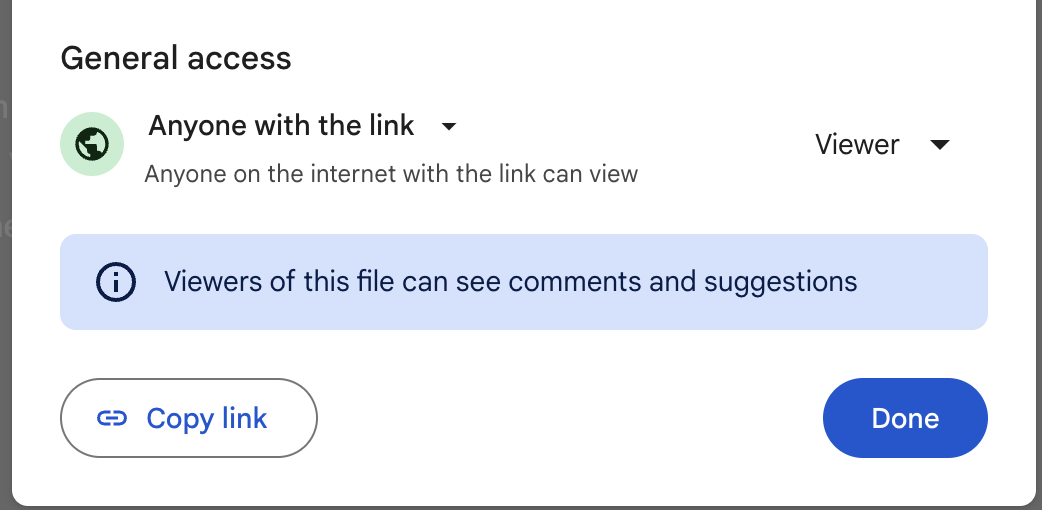



# Problem 5 (Total: 20 points)

We are interested in identifying if there is a relationship between the length of the genome and the number of genes found in a genome. We will use the summary available from [NCBI](https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/) across eukaryotes, prokaryotes and viruses.

We will use [ggplot2](https://ggplot2.tidyverse.org/) for plotting. There are multiple tutorials available on the web, but [see this](https://r-statistics.co/Complete-Ggplot2-Tutorial-Part1-With-R-Code.html) for a good starting point.

# Install packages

We weill install packages required for the rest of the analysis.


In [ ]:
list.of.packages <- c("tidyverse",  "ggpubr")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[, "Package"])]
if (length(new.packages)) install.packages(new.packages)

# Imports and functions

In [ ]:
library(tidyverse) # imports multiple packages for handling and plotting data easily
library(ggpubr) # a package for producing publication quality figures
theme_set(theme_pubr()) # set the theme to produce publication quality figures

# this function filters a given dataframe to only retain
# complete or near complete genomes by checking
# status is chromosome, complete genome or scaffold
FilterData <- function(df) {
  df <- df %>% filter(Status %in% c("Chromosome", "Complete Genome", "Scaffold"))
  return(df)
}

# Read Data

We will fetch data of all genomes on NCBI from its genome reports database. These are tab separated files which contain all the relevant information about a genome sequence deposited to NCBI: organism name, GC content, genome size, number of genes. Information on eukaryotic, prokaryotic and viral genomes are in separate files.

In [ ]:
eukaryotes <- read_tsv("https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/eukaryotes.txt")
prokaryotes <- read_tsv("https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/prokaryotes.txt")
viruses <- read_tsv("https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/viruses.txt")

viruses$`Size (Mb)` <- viruses$`Size (Kb)`/1000 # Viruses dataframe does not have a Size(Mb) column so we create it here

Rows: 37836 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (13): #Organism/Name, BioProject Accession, Group, SubGroup, GC%, Assem...
dbl   (4): TaxID, BioProject ID, Size (Mb), Scaffolds
date  (2): Release Date, Modify Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 727893 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (17): #Organism/Name, BioProject Accession, Group, SubGroup, GC%, Repli...
dbl   (4): TaxID, BioProject ID, Size (Mb), Scaffolds
date  (2): Release Date, Modify Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_type

You can see all the column names using the `columns()` command.

In [ ]:
colnames(prokaryotes)

[1] "#Organism/Name"       "TaxID"                "BioProject Accession"
 [4] "BioProject ID"        "Group"                "SubGroup"            
 [7] "Size (Mb)"            "GC%"                  "Replicons"           
[10] "WGS"                  "Scaffolds"            "Genes"               
[13] "Proteins"             "Release Date"         "Modify Date"         
[16] "Status"               "Center"               "BioSample Accession" 
[19] "Assembly Accession"   "Reference"            "FTP Path"            
[22] "Pubmed ID"            "Strain"

In [ ]:
colnames(viruses)

[1] "#Organism/Name"       "TaxID"                "BioProject Accession"
 [4] "BioProject ID"        "Group"                "SubGroup"            
 [7] "Size (Kb)"            "GC%"                  "Host"                
[10] "Segmemts"             "Genes"                "Proteins"            
[13] "Release Date"         "Modify Date"          "Status"              
[16] "Size (Mb)"

In [ ]:
colnames(eukaryotes)

[1] "#Organism/Name"       "TaxID"                "BioProject Accession"
 [4] "BioProject ID"        "Group"                "SubGroup"            
 [7] "Size (Mb)"            "GC%"                  "Assembly Accession"  
[10] "Replicons"            "WGS"                  "Scaffolds"           
[13] "Genes"                "Proteins"             "Release Date"        
[16] "Modify Date"          "Status"               "Center"              
[19] "BioSample Accession"

In [ ]:
prokaryotes$taxon <- "Prokaryote"
viruses$taxon <- "Virus"
eukaryotes$taxon <- "Eukaryote"

# collect all information in one data frame
all.data <- bind_rows(list(prokaryotes, viruses, eukaryotes))

# retain only more or less complete genomes: Chromosome/Scaffold/Whole Genome  and exclude 'Contigs'
data.filtered <- FilterData(all.data)
data.filtered$Genes <- as.numeric(data.filtered$Genes)

# remove genomes that have number of genes or genome size missing (NA)
data.filtered <- data.filtered %>%
  filter(!is.na(Genes)) %>%
  filter(!is.na(`Size (Mb)`))


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


# Problem 7(a): Plot the distbution of Genes (5 points)

- Which column represents the number of genes in the dataset?
- Plot a histogram of the log10(number of genes) in the dataset
- Calculate the summary of number of genes in the dataset

 [1] "#Organism/Name"       "TaxID"                "BioProject Accession"
 [4] "BioProject ID"        "Group"                "SubGroup"            
 [7] "Size (Mb)"            "GC%"                  "Replicons"           
[10] "WGS"                  "Scaffolds"            "Genes"               
[13] "Proteins"             "Release Date"         "Modify Date"         
[16] "Status"               "Center"               "BioSample Accession" 
[19] "Assembly Accession"   "Reference"            "FTP Path"            
[22] "Pubmed ID"            "Strain"               "taxon"               
[25] "Size (Kb)"            "Host"                 "Segmemts"            
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1    1176    2956    3357    4798 4736081 


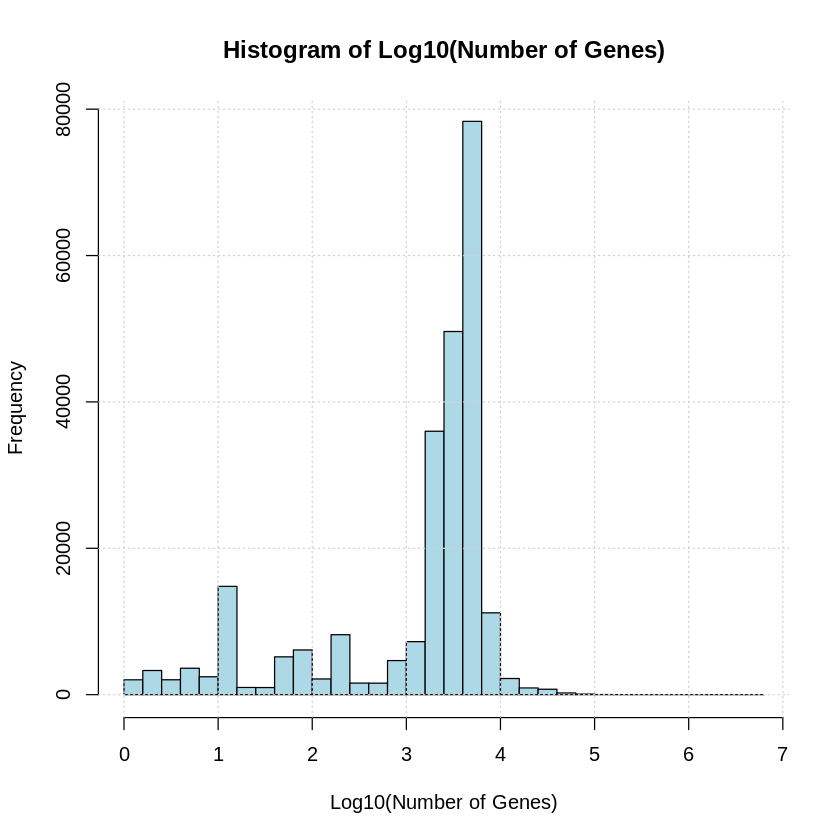

In [ ]:
# Print column names to identify the column for the number of genes
print(colnames(data.filtered))

# Assuming the column name is 'Genes'
number_of_genes_column <- 'Genes'

# Plot histogram of log10(number of genes)
hist(log10(data.filtered[[number_of_genes_column]]),
     breaks=30,
     col='lightblue',
     border='black',
     main='Histogram of Log10(Number of Genes)',
     xlab='Log10(Number of Genes)',
     ylab='Frequency')
grid()

# Calculate summary statistics of the number of genes
summary_stats <- summary(data.filtered[[number_of_genes_column]])

# Print summary statistics
print(summary_stats)


# Problem 7(b): Determine the 99.5% quantile of number of genes (5 points)

As you notice from the dataset most organism have <1e5 genes. There are some outlier species with very high number of genes (>1e6).
These are not real and are annotation artifacts. We want to first calculate what is the 99.5 percentile of the number of genes - it is a number such that 99.5% of the entries in our dataset are below this number. This will guard us against potential outliers.

In [ ]:
number_of_genes_column <- 'Genes'

# Calculate the 99.5% quantile of the number of genes
quantile_995 <- quantile(data.filtered[[number_of_genes_column]], 0.995)

# Print the 99.5% quantile
cat("The 99.5% quantile of the number of genes is:", quantile_995, "\n")


The 99.5% quantile of the number of genes is: 22439.74 


# Problem 7(c): Filter out dataset (5 points)

We will now use the `ngenes_995percentile` and retain only entries where the number of genes is below this number. We will store our results in a new dataframe `data.ultrafiltered`

In [ ]:
number_of_genes_column <- 'Genes'

# Calculate the 99.5% quantile of the number of genes
quantile_995 <- quantile(data.filtered[[number_of_genes_column]], 0.995)

# Filter the dataset to retain only entries with number of genes below the 99.5% quantile
filtered_data <- data.filtered[data.filtered[[number_of_genes_column]] <= quantile_995, ]

# Print the head of the filtered data frame to check
print(head(filtered_data))

# Optionally, print the number of entries retained
cat("Number of entries below the 99.5% quantile:", nrow(filtered_data), "\n")


# A tibble: 6 × 27
  `#Organism/Name`   TaxID `BioProject Accession` `BioProject ID` Group SubGroup
  <chr>              <dbl> <chr>                            <dbl> <chr> <chr>   
1 Campylobacter je… 1.92e5 PRJNA8                               8 Camp… Epsilon…
2 Pseudomonas fluo… 2.94e2 PRJEB22404                      401622 Pseu… Gammapr…
3 Xanthomonas camp… 3.59e5 PRJNA641237                     641237 Pseu… Gammapr…
4 Salmonella enter… 9.93e4 PRJNA241                           241 Pseu… Gammapr…
5 Yersinia pestis … 1.04e6 PRJNA67155                       67155 Pseu… Gammapr…
6 Staphylococcus a… 9.31e4 PRJNA237                           237 Terr… Bacillo…
# ℹ 21 more variables: `Size (Mb)` <dbl>, `GC%` <chr>, Replicons <chr>,
#   WGS <chr>, Scaffolds <dbl>, Genes <dbl>, Proteins <chr>,
#   `Release Date` <date>, `Modify Date` <date>, Status <chr>, Center <chr>,
#   `BioSample Accession` <chr>, `Assembly Accession` <chr>, Reference <chr>,
#   `FTP Path` <chr>, `Pubmed ID` <chr>, Stra

# Problem 7(d): How does the number of genes vary by genome size (5 points):

You want to plot the number of genes as a function of genome size using `data.ultrafiltered`. You already know the column which stores the genes information. The code for plotting the `GC%` as a function of genome size is available in [this notebook](https://colab.research.google.com/drive/1dfdE5dgJdMY3qo5GFtIJktMLSZEv3nNq)



The correlation between genome size and the number of genes is: 0.25 


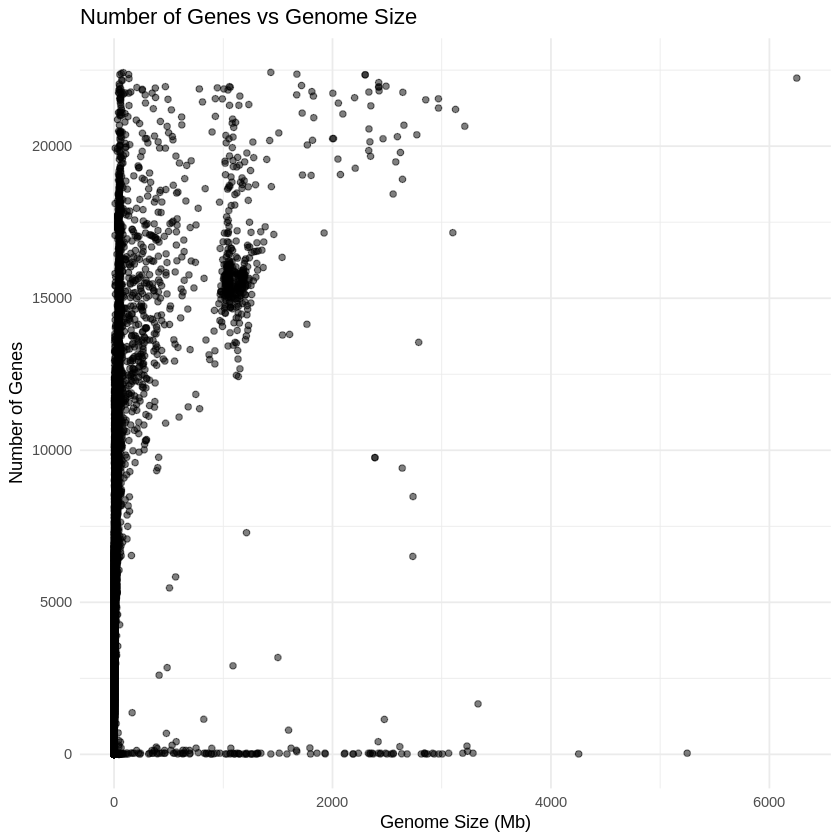

In [ ]:
# Load necessary library
library(ggplot2)

# Assuming `filtered_data` is the data frame from previous steps

# For this example, we'll assume the column names are 'Genes' and 'Size (Mb)'
genes_column <- 'Genes'
size_column <- 'Size (Mb)'

# Scatter plot to visualize the relationship between genome size and number of genes
ggplot(filtered_data, aes(x = .data[[size_column]], y = .data[[genes_column]])) +
  geom_point(alpha = 0.5) +
  ggtitle('Number of Genes vs Genome Size') +
  xlab('Genome Size (Mb)') +
  ylab('Number of Genes') +
  theme_minimal()

# Calculate the correlation between genome size and number of genes
correlation <- cor(filtered_data[[size_column]], filtered_data[[genes_column]])

# Print the correlation
cat("The correlation between genome size and the number of genes is:", round(correlation, 2), "\n")


# Problem 7(e): What are the distinct clusters in the eukaryote data (5 points):

You would now like to investigate what is happening with the Eukaryotes data points. If you plotted the above relationship you will see there is something interesting about the eukaryotes - they form two separate cluster of data points.  You can use the metadata available the dataframe to color the points.

Generate a plot which would highlight the what is going on with the two cluster of points in the Eukaryotes.

Warning message in lapply(eukaryotes[features], as.numeric):
“NAs introduced by coercion”


[1] "Cluster centers in the original feature space:"
   Size (Mb)    Genes
1   72.26935 12966.03
2 1084.63054 25921.54
3 3185.51300 76359.36


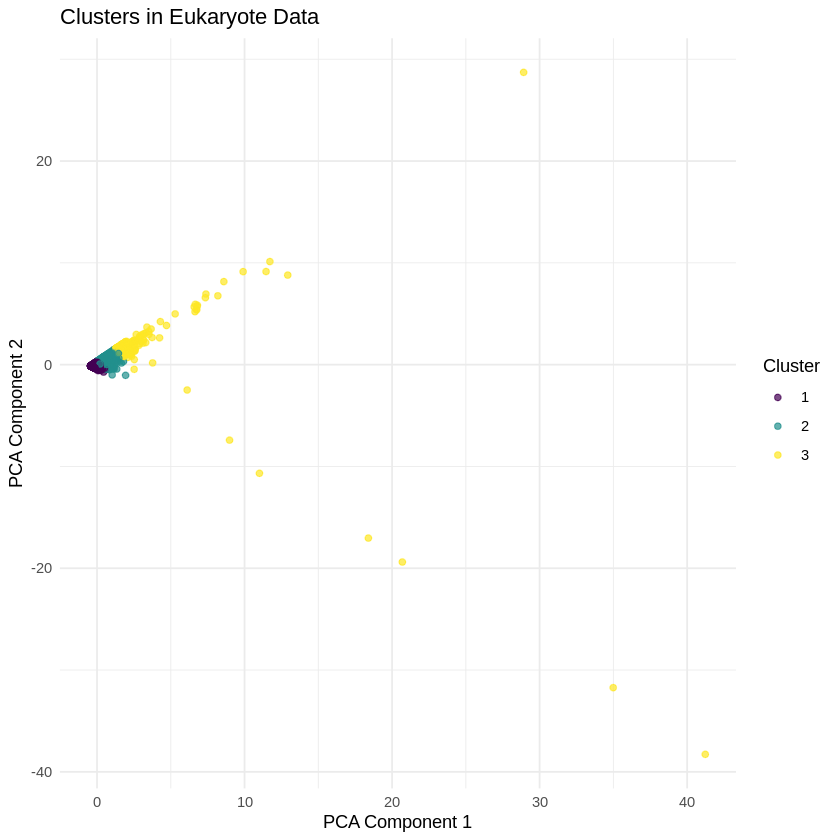

In [ ]:
# Load necessary libraries
library(ggplot2)

# Assuming `eukaryotes` is the data frame with eukaryote data

# Preprocess data: select relevant columns and handle missing values
features <- c('Size (Mb)', 'Genes')  # Example features, adjust as needed

# Convert columns to numeric, forcing any non-convertible values to NA
eukaryotes[features] <- lapply(eukaryotes[features], as.numeric)

# Drop rows with missing or non-numeric data
eukaryotes_filtered <- na.omit(eukaryotes[features])

# Standardize features
eukaryotes_scaled <- scale(eukaryotes_filtered)

# Perform K-Means clustering
set.seed(42)  # For reproducibility
kmeans_result <- kmeans(eukaryotes_scaled, centers = 3)  # Adjust the number of clusters as needed
eukaryotes_filtered$Cluster <- as.factor(kmeans_result$cluster)

# Dimensionality reduction for visualization
pca_result <- prcomp(eukaryotes_scaled, center = TRUE, scale. = TRUE)
eukaryotes_filtered$PCA1 <- pca_result$x[, 1]
eukaryotes_filtered$PCA2 <- pca_result$x[, 2]

# Plot clusters
ggplot(eukaryotes_filtered, aes(x = PCA1, y = PCA2, color = Cluster)) +
  geom_point(alpha = 0.7) +
  scale_color_viridis_d() +
  ggtitle('Clusters in Eukaryote Data') +
  xlab('PCA Component 1') +
  ylab('PCA Component 2') +
  theme_minimal()

# Print cluster centers (in original feature space)
cluster_centers_scaled <- kmeans_result$centers
# Reversing scaling to original feature space
cluster_centers_original <- t(t(cluster_centers_scaled) * attr(eukaryotes_scaled, "scaled:scale") + attr(eukaryotes_scaled, "scaled:center"))
print("Cluster centers in the original feature space:")
print(cluster_centers_original)
